In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df_bat = pd.read_csv('/content/drive/MyDrive/Sports Analytics_Biswas/bat_train_test_dataset.csv')
df_bat.head()

,Unnamed: 0,id,Runs_scored,batting_team,bowling_team,No_4s,No_6s,Balls_faced,Strike_rate,city,Man_of_match,No_30,No_50,No_100,Runs_category,date
0,1,392184,10,Kolkata Knight Riders,Deccan Chargers,1,1,12,83.3,Cape Town,0,0,0,0,10_29,2009
1,2,392186,44,Kolkata Knight Riders,Kings XI Punjab,2,4,29,151.7,Durban,1,1,0,0,30_49,2009
2,3,392190,41,Kolkata Knight Riders,Rajasthan Royals,2,4,38,107.9,Cape Town,0,1,0,0,30_49,2009
3,4,392197,12,Kolkata Knight Riders,Mumbai Indians,0,1,12,100.0,Port Elizabeth,0,0,0,0,10_29,2009
4,5,392199,40,Kolkata Knight Riders,Royal Challengers Bangalore,6,0,38,105.3,Durban,0,1,0,0,30_49,2009


In [3]:
df_bat= df_bat.drop(['Unnamed: 0','Runs_scored','id'],axis = 1)


In [4]:
from sklearn.preprocessing import LabelEncoder

def encode(Player,col1,col2,col3,col4):
    le = LabelEncoder()
    Player[col1] = le.fit_transform(Player[col1])
    Player[col2] = le.fit_transform(Player[col2])
    Player[col3] = le.fit_transform(Player[col3])
    Player[col4] = le.fit_transform(Player[col4])
encode(df_bat,'bowling_team','city','Runs_category','batting_team')
df_bat


,batting_team,bowling_team,No_4s,No_6s,Balls_faced,Strike_rate,city,Man_of_match,No_30,No_50,No_100,Runs_category,date
0,2,2,1,1,12,83.3,6,0,0,0,0,1,2009
1,2,5,2,4,29,151.7,13,1,1,0,0,2,2009
2,2,10,2,4,38,107.9,6,0,1,0,0,2,2009
3,2,8,0,1,12,100.0,25,0,0,0,0,1,2009
4,2,13,6,0,38,105.3,13,0,1,0,0,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2,11,0,0,9,44.4,22,0,0,0,0,0,2017
555,2,13,0,0,6,0.0,3,0,0,0,0,0,2017
556,2,5,0,0,3,66.7,8,0,0,0,0,0,2017
557,2,8,0,3,9,222.2,22,0,0,0,0,1,2017


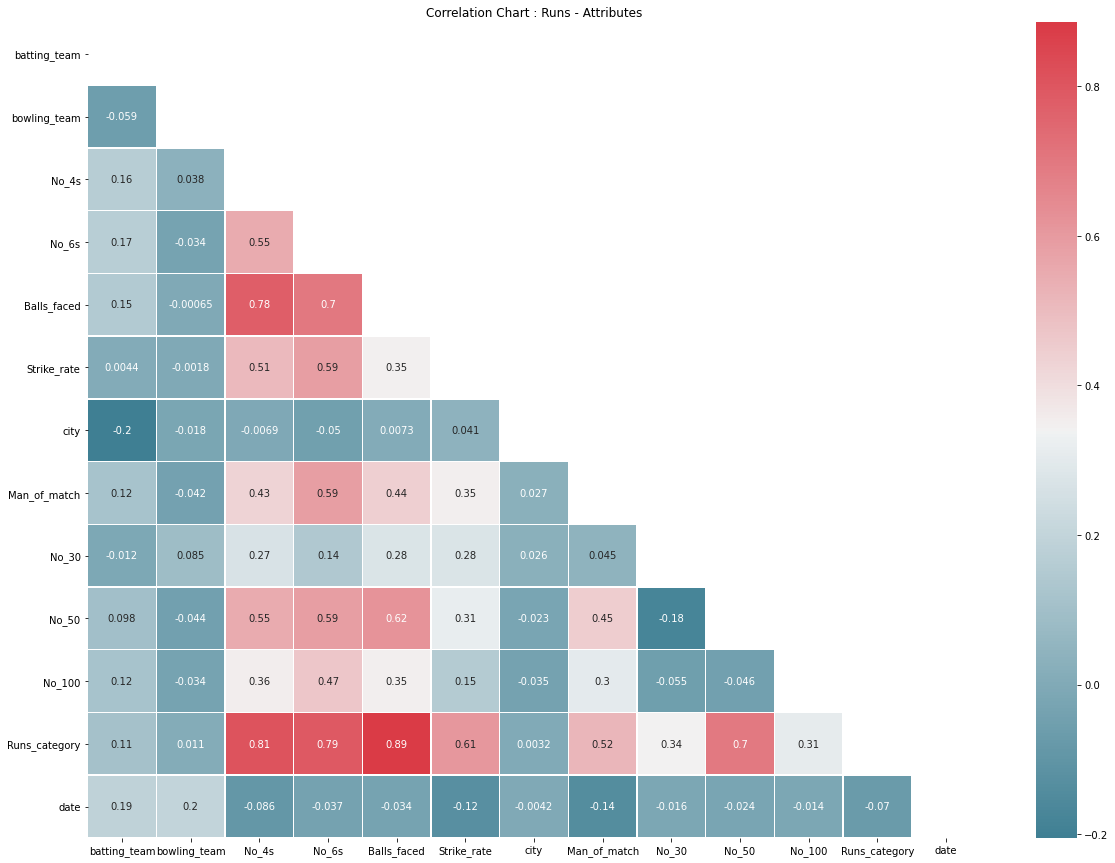

In [5]:
# Check correlation 

from matplotlib import pyplot as plt
import seaborn as sns


corr_df_bat =df_bat.corr()
# Drop self-correlations
dropSelf = np.zeros_like(corr_df_bat)
dropSelf[np.triu_indices_from(dropSelf)] = True
# Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_df_bat,cmap=colormap,linewidths=.5, annot=True, mask=dropSelf)
plt.title('Correlation Chart : Runs - Attributes')
plt.show()


In [6]:
target=df_bat['Runs_category']
train=df_bat.drop('Runs_category', axis=1)

In [7]:
#importing libraries for classifiers 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

#importing libraries for precision, accuracy score, barplot and table for comparision
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from seaborn import barplot
from tabulate import tabulate



In [8]:
# Built a function to construct and compare different calssifiers 
def train_test_fun (X_train, X_test, y_train, y_test):
  ML_models = dict()  #keeping record of accuracy of all models 
  # 1. Decison Tree 
  DT_model=DecisionTreeClassifier(criterion='gini', splitter='best',
                             max_depth=16, min_samples_split=2,
                             min_samples_leaf=1) # model
  DT_model.fit(X_train,y_train)  #training the model 
  y_pred_DT=DT_model.predict(X_test) #testing the model
  DT_accuracy=accuracy_score(y_test,y_pred_DT) # accuracy of model
  DT_precision=precision_score(y_test,y_pred_DT,average='weighted') # Weighted precision of model
  ML_models["Decision Tree"] = DT_accuracy  #updating dictionary 

  # 2. Naive Bayes
  NB_model=GaussianNB() # model
  NB_model.fit(X_train,y_train) #training the model 
  y_pred_NB=NB_model.predict(X_test) #testing the model
  NB_accuracy=accuracy_score(y_test,y_pred_NB)  # accuracy of model 
  NB_precision=precision_score(y_test,y_pred_NB,average='weighted')  # Weighted precision of model
  ML_models["Naive Bayes"] = NB_accuracy #updating dictionary

  # 3. Random Forest
  RF_model=RandomForestClassifier(n_estimators=50) #model
  RF_model.fit(X_train,y_train) #training model 
  y_pred_RF=RF_model.predict(X_test) #testing model 
  RF_accuracy=accuracy_score(y_test,y_pred_RF) # accuracy of model 
  RF_precision=precision_score(y_test,y_pred_RF,average='weighted') # Weighted precision of model
  ML_models["Random Forest"] = RF_accuracy #updating dictionary

  # 4. SVM 
  SVM_model = svm.SVC(kernel='linear') # Linear Kernel model
  SVM_model.fit(X_train, y_train) #training model 
  y_pred_SVM = SVM_model.predict(X_test) #testing model 
  SVM_accuracy=accuracy_score(y_test,y_pred_SVM) 
  SVM_precision=precision_score(y_test,y_pred_SVM,average='weighted')
  ML_models["SVM"] = RF_accuracy #updating dictionary

  #Table for comparision 
  print(tabulate([['Decision Tree', DT_accuracy,DT_precision], ['Naive Bayes', NB_accuracy,NB_precision],
                  ['Random Forest', RF_accuracy,RF_precision],['SVM', SVM_accuracy,SVM_precision]], 
                 headers=['Model','Accuracy','Precision']))

  #Barplot for Accuracy of models
  names_models = list(ML_models.keys())
  accuracy_models = list(map(float, ML_models.values()))


  return barplot(names_models, accuracy_models)




Model            Accuracy    Precision
-------------  ----------  -----------
Decision Tree    0.922619     0.920722
Naive Bayes      0.952381     0.954609
Random Forest    0.946429     0.947499
SVM              0.916667     0.922091


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


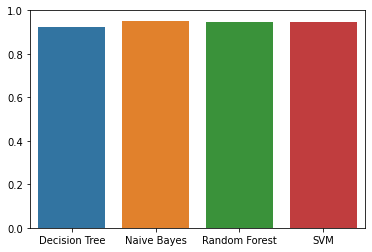

In [9]:
from sklearn.model_selection import train_test_split

# train dataset 70% , Test dataset 30% 
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.30, random_state = 0)
train_test_fun (X_train, X_test, y_train, y_test)

Model            Accuracy    Precision
-------------  ----------  -----------
Decision Tree    0.964286     0.96668
Naive Bayes      0.964286     0.96627
Random Forest    0.973214     0.975416
SVM              0.955357     0.957061


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


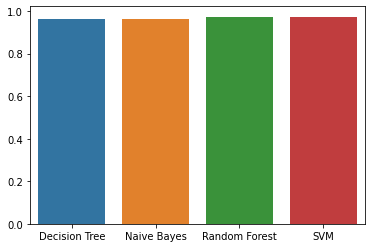

In [10]:
# train dataset 80% , Test dataset 20% 
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.20, random_state = 0)
train_test_fun (X_train, X_test, y_train, y_test)

Model            Accuracy    Precision
-------------  ----------  -----------
Decision Tree    0.982143     0.982919
Naive Bayes      0.964286     0.968038
Random Forest    0.982143     0.982919
SVM              0.946429     0.949405


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


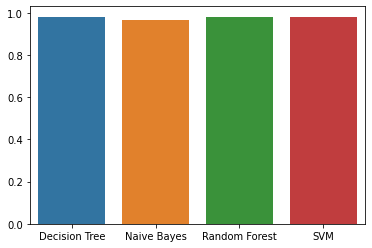

In [11]:
# train dataset 90% , Test dataset 10% 
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.10, random_state = 0)
train_test_fun  (X_train, X_test, y_train, y_test)

Predicting Runs scored by Pollard ,Watson and Yuvraj

In [12]:
df_Pollard_Raw = pd.read_csv('/content/drive/MyDrive/Sports Analytics_Biswas/Pollard_pred_data.csv')
df_Pollard_bat= df_Pollard_Raw.drop(['Unnamed: 0','id','Runs_scored','Runs_category'],axis = 1)
df_Pollard_bat=df_Pollard_bat.sample(n=10, random_state=6) 

df_Watson_Raw = pd.read_csv('/content/drive/MyDrive/Sports Analytics_Biswas/Watson_pred_data.csv')
df_Watson_bat= df_Watson_Raw.drop(['Unnamed: 0','id','Runs_scored','Runs_category'],axis = 1)
df_Watson_bat=df_Watson_bat.sample(n=10, random_state=6)

df_Yuvraj_Raw= pd.read_csv('/content/drive/MyDrive/Sports Analytics_Biswas/Yuvraj_pred_data.csv')
df_Yuvraj_bat= df_Yuvraj_Raw.drop(['Unnamed: 0','id','Runs_scored','Runs_category'],axis = 1)
df_Yuvraj_bat=df_Yuvraj_bat.sample(n=10, random_state=6)

df_Yusuf_Raw= pd.read_csv('/content/drive/MyDrive/Sports Analytics_Biswas/Yusuf_pred_data.csv')
df_Yusuf_bat= df_Yusuf_Raw.drop(['Unnamed: 0','id','Runs_scored','Runs_category'],axis = 1)
df_Yusuf_bat=df_Yusuf_bat.sample(n=10, random_state=6)


In [13]:

def encode(Player,col1,col2,col3):
    le = LabelEncoder()
    Player[col1] = le.fit_transform(Player[col1])
    Player[col2] = le.fit_transform(Player[col2])
    Player[col3] = le.fit_transform(Player[col3])
encode(df_Pollard_bat,'bowling_team','city','batting_team')
encode(df_Watson_bat,'bowling_team','city','batting_team')
encode(df_Yuvraj_bat,'bowling_team','city','batting_team')
encode(df_Yusuf_bat,'bowling_team','city','batting_team')

In [14]:
#  Random Forest - most accurate model 
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.10, random_state = 0)
RF_model=RandomForestClassifier(n_estimators=50) #model
RF_model.fit(X_train,y_train) #training model 


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
from collections import Counter
import numpy as np

#Runs Prediction 

Runs_Pollard=RF_model.predict(df_Pollard_bat)
Runs_Watson=RF_model.predict(df_Watson_bat)
Runs_Yuvraj=RF_model.predict(df_Yuvraj_bat)
Runs_Yusuf=RF_model.predict(df_Yusuf_bat)


Predicted_Runs = {'Player':['Watson','Pollard', 'Yuvraj','Yusuf' ],
        'Predicted_runs(10_matches)':[sum(Runs_Watson),sum(Runs_Pollard), sum(Runs_Yuvraj), sum(Runs_Yusuf) ]}
 
# Create DataFrame
Predicted_Runs_df = pd.DataFrame(Predicted_Runs)
Predicted_Runs_df

,Player,Predicted_runs(10_matches)
0,Watson,18
1,Pollard,13
2,Yuvraj,9
3,Yusuf,6


 **Bowling Analysis and Prediction**

In [16]:
df_bowl = pd.read_csv('/content/drive/MyDrive/Sports Analytics_Biswas/train_test_dataset_bowl.csv')
df_bowl

,Unnamed: 0,id,Wickets_taken,Overs_bowled,batting_team,bowling_team,Total_runs_conceded,Bowling_economy,city,3 Wickets,5 Wickets,Wickets_Category,date
0,1,392184,0,1,Deccan Chargers,Kolkata Knight Riders,14,14.0,Cape Town,0,0,1,2009
1,2,392186,0,1,Kings XI Punjab,Kolkata Knight Riders,14,14.0,Durban,0,0,1,2009
2,3,392190,0,4,Rajasthan Royals,Kolkata Knight Riders,20,5.0,Cape Town,0,0,1,2009
3,4,392197,0,2,Mumbai Indians,Kolkata Knight Riders,24,12.0,Port Elizabeth,0,0,1,2009
4,5,392199,0,4,Royal Challengers Bangalore,Kolkata Knight Riders,31,7.8,Durban,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,281,598034,0,2,Chennai Super Kings,Kolkata Knight Riders,18,9.0,Chennai,0,0,1,2013
281,282,598040,0,1,Delhi Daredevils,Kolkata Knight Riders,11,11.0,Raipur,0,0,1,2013
282,283,598057,0,1,Royal Challengers Bangalore,Kolkata Knight Riders,7,7.0,Ranchi,0,0,1,2013
283,284,598069,0,4,Sunrisers Hyderabad,Kolkata Knight Riders,29,7.2,Hyderabad,0,0,1,2013


In [17]:
df_bowl= df_bowl.drop(['Unnamed: 0','id','Wickets_taken'],axis = 1)
df_bowl.head(3)

,Overs_bowled,batting_team,bowling_team,Total_runs_conceded,Bowling_economy,city,3 Wickets,5 Wickets,Wickets_Category,date
0,1,Deccan Chargers,Kolkata Knight Riders,14,14.0,Cape Town,0,0,1,2009
1,1,Kings XI Punjab,Kolkata Knight Riders,14,14.0,Durban,0,0,1,2009
2,4,Rajasthan Royals,Kolkata Knight Riders,20,5.0,Cape Town,0,0,1,2009


In [18]:
def encode(Player,col1,col2,col3,col4):
    le = LabelEncoder()
    Player[col1] = le.fit_transform(Player[col1])
    Player[col2] = le.fit_transform(Player[col2])
    Player[col3] = le.fit_transform(Player[col3])
    Player[col3] = le.fit_transform(Player[col3])
encode(df_bowl,'batting_team','city','bowling_team','Wickets_Category')
df_bowl.head(3)

,Overs_bowled,batting_team,bowling_team,Total_runs_conceded,Bowling_economy,city,3 Wickets,5 Wickets,Wickets_Category,date
0,1,1,2,14,14.0,5,0,0,1,2009
1,1,3,2,14,14.0,12,0,0,1,2009
2,4,8,2,20,5.0,5,0,0,1,2009


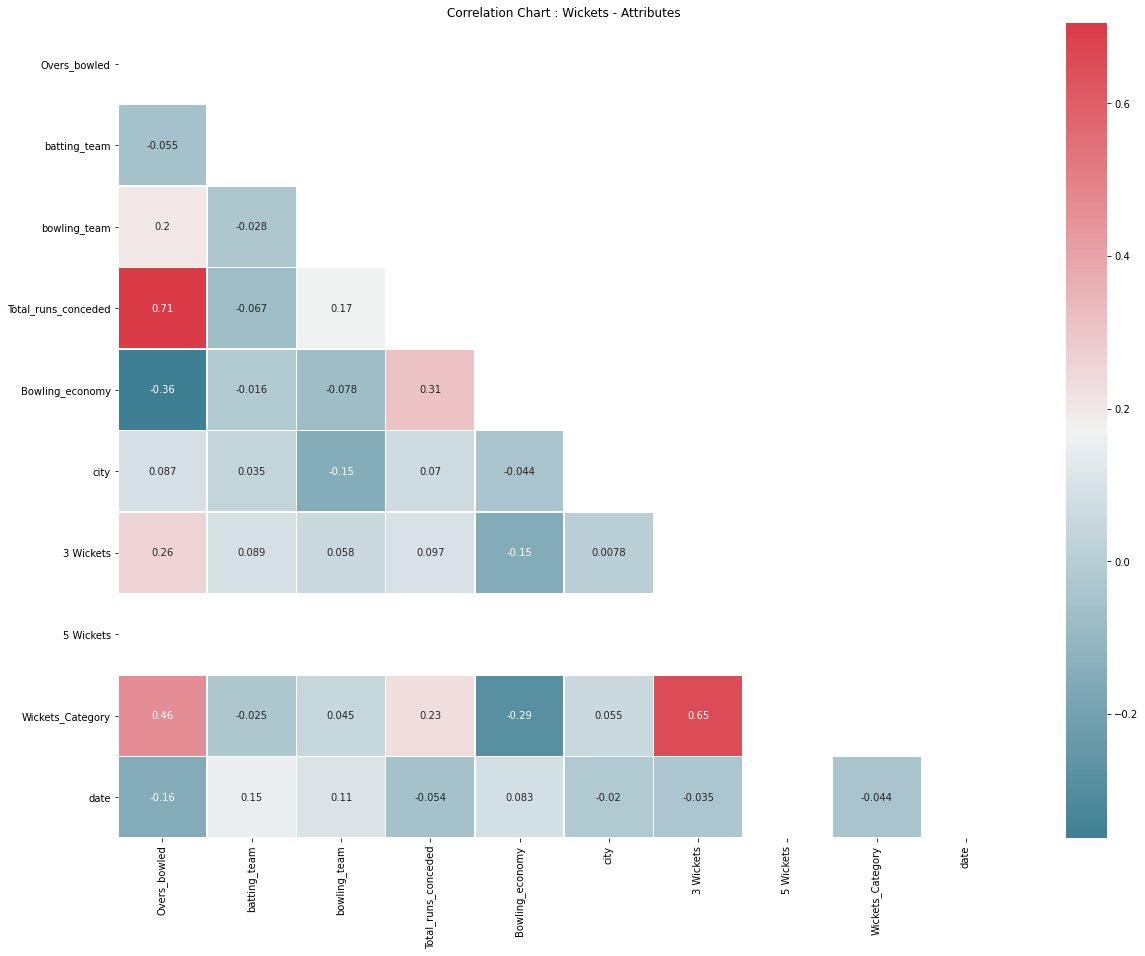

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
corr_df_bowl =df_bowl.corr()
# Drop self-correlations
dropSelf = np.zeros_like(corr_df_bowl)
dropSelf[np.triu_indices_from(dropSelf)] = True
# Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_df_bowl,cmap=colormap,linewidths=.5, annot=True, mask=dropSelf)
plt.title('Correlation Chart : Wickets - Attributes')
plt.show()

In [20]:
target=df_bowl['Wickets_Category']
train=df_bowl.drop('Wickets_Category', axis=1)

Model            Accuracy    Precision
-------------  ----------  -----------
Decision Tree    0.662791     0.668227
Naive Bayes      0.686047     0.683561
Random Forest    0.709302     0.699336
SVM              0.686047     0.670516


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variab

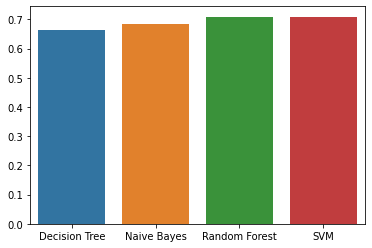

In [21]:
# train dataset 70% , Test dataset 30% 
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.30, random_state = 0)
train_test_fun  (X_train, X_test, y_train, y_test)

Model            Accuracy    Precision
-------------  ----------  -----------
Decision Tree    0.614035     0.612121
Naive Bayes      0.719298     0.704763
Random Forest    0.684211     0.689026
SVM              0.719298     0.739901


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


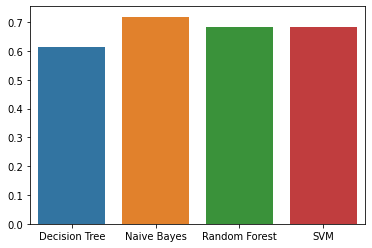

In [22]:
# train dataset 80% , Test dataset 20% 
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.20, random_state = 0)
train_test_fun  (X_train, X_test, y_train, y_test)

Model            Accuracy    Precision
-------------  ----------  -----------
Decision Tree    0.551724     0.554377
Naive Bayes      0.62069      0.702821
Random Forest    0.689655     0.702821
SVM              0.724138     0.778736


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


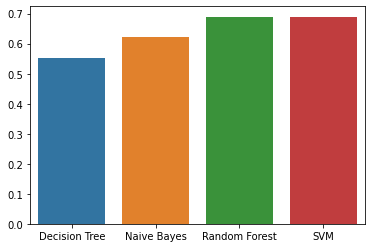

In [23]:
# train dataset 90% , Test dataset 10% 
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.10, random_state = 0)
train_test_fun  (X_train, X_test, y_train, y_test)

Predicting Wickets taken by Pollard ,Watson and Yuvraj

In [49]:
df_Pollard_RawB = pd.read_csv('/content/drive/MyDrive/Sports Analytics_Biswas/Pollard_pred_data_bowl.csv')
df_Pollard_B= df_Pollard_RawB.drop(['Unnamed: 0','id','Wickets_taken','Wickets_Category'],axis = 1)
df_Pollard_B=df_Pollard_B.sample(n=10,random_state=2)
df_Pollard_B

df_Watson_RawB = pd.read_csv('/content/drive/MyDrive/Sports Analytics_Biswas/Watson_pred_data_bowl.csv')
df_Watson_B= df_Watson_RawB.drop(['Unnamed: 0','id','Wickets_taken','Wickets_Category'],axis = 1)
df_Watson_B=df_Watson_B.sample(n=10,random_state=2)
df_Watson_B

df_Yuvraj_RawB= pd.read_csv('/content/drive/MyDrive/Sports Analytics_Biswas/Yuvraj_pred_data_bowl.csv')
df_Yuvraj_B= df_Yuvraj_RawB.drop(['Unnamed: 0','id','Wickets_taken','Wickets_Category'],axis = 1)
df_Yuvraj_B=df_Yuvraj_B.sample(n=10,random_state=2)
df_Yuvraj_B

df_Yusuf_RawB= pd.read_csv('/content/drive/MyDrive/Sports Analytics_Biswas/Yusuf_pred_data_bowl.csv')
df_Yusuf_B= df_Yusuf_RawB.drop(['Unnamed: 0','id','Wickets_taken','Wickets_Category'],axis = 1)
df_Yusuf_B=df_Yusuf_B.sample(n=10,random_state=2)
df_Yusuf_B


,Overs_bowled,batting_team,bowling_team,Total_runs_conceded,Bowling_economy,city,3 Wickets,5 Wickets,date
11,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,17.0,Hyderabad,0,0,2017
4,1,Sunrisers Hyderabad,Kolkata Knight Riders,19,19.0,Kolkata,0,0,2015
5,1,Kings XI Punjab,Kolkata Knight Riders,6,6.0,Chandigarh,0,0,2016
0,4,Royal Challengers Bangalore,Kolkata Knight Riders,43,10.8,Kolkata,0,0,2015
9,1,Gujarat Lions,Kolkata Knight Riders,15,15.0,Rajkot,0,0,2017
3,2,Sunrisers Hyderabad,Kolkata Knight Riders,18,9.0,Visakhapatnam,0,0,2015
1,2,Chennai Super Kings,Kolkata Knight Riders,11,5.5,Kolkata,0,0,2015
10,1,Sunrisers Hyderabad,Kolkata Knight Riders,2,2.0,Kolkata,0,0,2017
7,1,Sunrisers Hyderabad,Kolkata Knight Riders,4,4.0,Kolkata,0,0,2016
12,1,Sunrisers Hyderabad,Kolkata Knight Riders,7,7.0,Bangalore,0,0,2017


In [50]:
def encode(Player,col1,col2,col3):
    le = LabelEncoder()
    Player[col1] = le.fit_transform(Player[col1])
    Player[col2] = le.fit_transform(Player[col2])
    Player[col3] = le.fit_transform(Player[col3])
encode(df_Pollard_B,'batting_team','city','bowling_team')
encode(df_Watson_B,'batting_team','city','bowling_team')
encode(df_Yuvraj_B,'batting_team','city','bowling_team')
encode(df_Yusuf_B,'batting_team','city','bowling_team')


In [51]:
#The model performed best with 90-10 split on SVM with highest accuracy and precision

# train dataset 90% , Test dataset 10% 
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.10, random_state = 0)
SVM_model = svm.SVC(kernel='linear') # Linear Kernel model
SVM_model.fit(X_train, y_train) #training model 


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
Wickets_Pollard=SVM_model.predict(df_Pollard_B)
Wickets_Watson=SVM_model.predict(df_Watson_B)
Wickets_Yuvraj=SVM_model.predict(df_Yuvraj_B)
Wickets_Yusuf=SVM_model.predict(df_Yusuf_B)



Predicted_Wickets = {'Player':['Pollard', 'Watson', 'Yuvraj', 'Yusuf'],
        'Predicted_Wickets(10_matches)':[sum(Wickets_Pollard), sum(Wickets_Watson),sum(Wickets_Yuvraj), sum(Wickets_Yusuf)]}
 
# Create DataFrame
Predicted_Wickets_df = pd.DataFrame(Predicted_Wickets)
Predicted_Wickets_df

,Player,Predicted_Wickets(10_matches)
0,Pollard,19
1,Watson,22
2,Yuvraj,15
3,Yusuf,17


#Final Table (Runs + Wickets Predictions) in randomly selected 10 matches 

In [53]:
Final_table=pd.merge(Predicted_Runs_df, Predicted_Wickets_df, on=["Player"])
Final_table

,Player,Predicted_runs(10_matches),Predicted_Wickets(10_matches)
0,Watson,18,22
1,Pollard,13,19
2,Yuvraj,9,15
3,Yusuf,6,17
